<a href="https://colab.research.google.com/github/AmauryCazares/telecomx/blob/main/telecomx(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías**

In [ ]:

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas import json_normalize

# **Extracción de datos**

In [ ]:

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
print(df.head())
df.info()

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

# **Normalización de JSON anidado**

In [ ]:

df_normalizados = json_normalize(data)
df_normalizados.info()
print(df_normalizados.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
for col in df_normalizados.columns:
    print(f"Valores únicos en la columna '{col}': {df_normalizados[col].nunique()}")
    if df_normalizados[col].nunique() < 50:
        print(df_normalizados[col].unique())
        print('-' * 50)

Valores únicos en la columna 'customerID': 7267
Valores únicos en la columna 'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
Valores únicos en la columna 'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
Valores únicos en la columna 'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
Valores únicos en la columna 'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
Valores únicos en la columna 'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
Valores únicos en la columna 'customer.tenure': 73
Valores únicos en la columna 'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
Valores únicos en la columna 'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
Valores únicos en la columna 'internet.InternetService': 3
['DSL' 'Fiber o

In [ ]:
df_normalizados.head(5)

,customerID,Baja,Genero,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,servicio_internet,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,tipo_de_contrato,account.PaperlessBilling,forma_pago,gasto_mensual,gasto_total,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


# **Verificación de duplicados y valores nulos**

In [ ]:
duplicados = df_normalizados.duplicated().sum()
print(f"Número de líneas duplicadas: {duplicados}")

Número de líneas duplicadas: 0


In [ ]:
print("\nValores nulos por columna:")
print(df_normalizados.isnull().sum())


Valores nulos por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [ ]:
datos_vacios = df_normalizados.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores en blancos o vacíos por columna:")
print(datos_vacios[datos_vacios > 0])


Valores en blancos o vacíos por columna:
Churn    224
dtype: int64


#  **Limpieza de columna 'account.Charges.Total'**

In [ ]:
# 🧹 Limpieza de columna 'account.Charges.Total'
df_normalizados['account.Charges.Total'] = df_normalizados['account.Charges.Total'].astype(str)
df_normalizados['account.Charges.Total'] = df_normalizados['account.Charges.Total'].replace(r'^\s*$', np.nan, regex=True)
df_normalizados.dropna(subset=['account.Charges.Total'], inplace=True)
df_normalizados['account.Charges.Total'] = df_normalizados['account.Charges.Total'].astype(np.float64)

In [ ]:

df_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Baja                       7032 non-null   object 
 2   Genero                     7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   int64  
 5   customer.Dependents        7256 non-null   int64  
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   int64  
 8   phone.MultipleLines        7256 non-null   object 
 9   servicio_internet          7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   object 
 11  internet.OnlineBackup      7256 non-null   object 
 12  internet.DeviceProtection  7256 non-null   object 
 13  internet.TechSupport       7256 non-null   object 
 1

In [ ]:

col_bin=['Churn','customer.Partner','customer.Dependents','phone.PhoneService','account.PaperlessBilling']

for i in col_bin:
  print(f'La columna {i} tiene: {df_normalizados[i].unique()}')

La columna Churn tiene: ['0' '1' '']
La columna customer.Partner tiene: [1 0]
La columna customer.Dependents tiene: [1 0]
La columna phone.PhoneService tiene: [1 0]
La columna account.PaperlessBilling tiene: [1 0]


In [ ]:
df_normalizados['Churn']=df_normalizados['Churn'].replace('',np.nan)
df_normalizados['Churn'].unique()

array(['0', '1', nan], dtype=object)

In [ ]:
# 🔢 Cálculo de cuentas diarias
df_normalizados['cuentas_diarias'] = round(df_normalizados['account.Charges.Monthly'] / 30, 2)
df_normalizados.head(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.80
5,0013-MHZWF,0,Female,0,0,1,9,1,0,DSL,...,No,Yes,Yes,Yes,Month-to-month,1,Credit card (automatic),69.40,571.45,2.31
6,0013-SMEOE,0,Female,1,1,0,71,1,0,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,1,Bank transfer (automatic),109.70,7904.25,3.66
7,0014-BMAQU,0,Male,0,1,0,63,1,1,Fiber optic,...,No,Yes,No,No,Two year,1,Credit card (automatic),84.65,5377.80,2.82
8,0015-UOCOJ,0,Female,1,0,0,7,1,0,DSL,...,No,No,No,No,Month-to-month,1,Electronic check,48.20,340.35,1.61
9,0016-QLJIS,0,Female,0,1,1,65,1,1,DSL,...,Yes,Yes,Yes,Yes,Two year,1,Mailed check,90.45,5957.90,3.02


In [ ]:
# 📊 Análisis Descriptivo
print(df_normalizados.describe())

       customer.SeniorCitizen  customer.Partner  customer.Dependents  \
count               7256.0000       7256.000000          7256.000000   
mean                   0.1629          0.483600             0.299063   
std                    0.3693          0.499765             0.457879   
min                    0.0000          0.000000             0.000000   
25%                    0.0000          0.000000             0.000000   
50%                    0.0000          0.000000             0.000000   
75%                    0.0000          1.000000             1.000000   
max                    1.0000          1.000000             1.000000   

       customer.tenure  phone.PhoneService  account.PaperlessBilling  \
count      7256.000000         7256.000000               7256.000000   
mean         32.395535            0.902839                  0.593716   
std          24.558067            0.296197                  0.491173   
min           1.000000            0.000000                  0.0

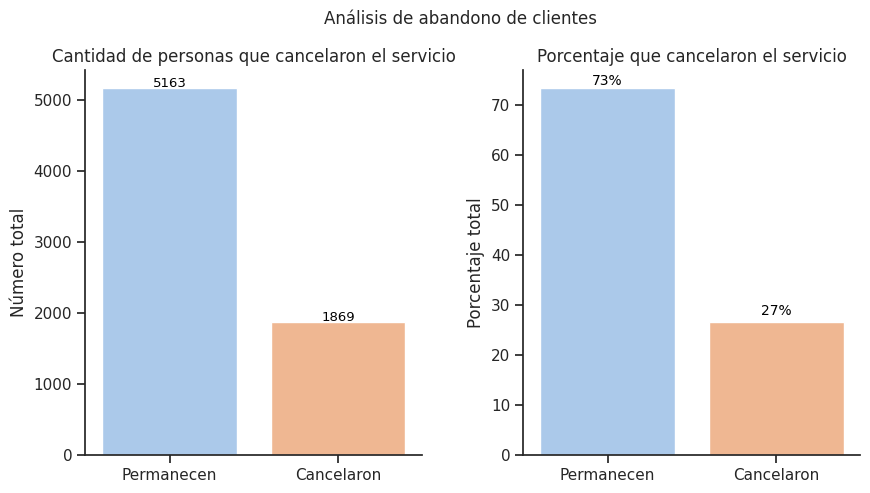

In [ ]:
df_churn = df_normalizados['Churn'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Análisis de abandono de clientes', y=1, fontsize=12)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

def graficar_churn_numeros(datos, ax, titulo):
    sns.barplot(x=datos.index, y=datos.values, hue=datos.index, ax=ax, palette='pastel')
    ax.set_title(titulo)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Permanecen', 'Cancelaron'])
    ax.set_ylabel('Número total')
    ax.set_xlabel('')
    for i, j in enumerate(datos.values):
        ax.text(i, j + 20, str(j), color='black', fontsize=9.5, ha='center')

def graficar_churn_porcentajes(datos, ax, titulo):
    porcentajes = (datos.values / datos.values.sum()) * 100
    sns.barplot(x=datos.index, y=porcentajes, hue=datos.index, ax=ax, palette='pastel')
    ax.set_title(titulo)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Permanecen', 'Cancelaron'])
    ax.set_ylabel('Porcentaje total')
    ax.set_xlabel('')
    for i, j in enumerate(porcentajes.round(0)):
        ax.text(i, j + 1, f'{int(j)}%', color='black', fontsize=10, ha='center')

graficar_churn_numeros(df_churn, ax[0], 'Cantidad de personas que cancelaron el servicio')
graficar_churn_porcentajes(df_churn, ax[1], 'Porcentaje que cancelaron el servicio')
plt.show()


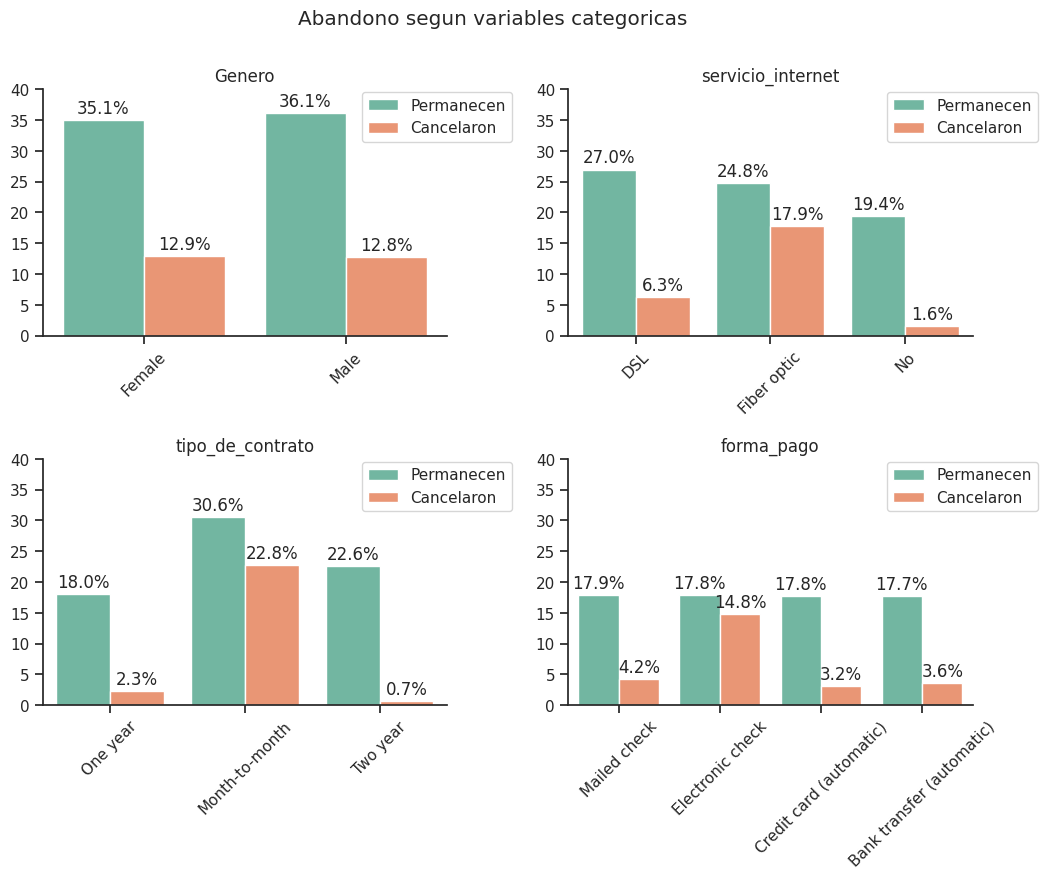

In [ ]:
df_normalizados.rename(columns={'Churn':'Baja','customer.gender':'Genero','internet.InternetService':'servicio_internet',
                           'account.Contract':'tipo_de_contrato','account.PaymentMethod':'forma_pago'},inplace=True)



analisis=['Genero','servicio_internet','tipo_de_contrato','forma_pago']

fig, axs=plt.subplots(2,2, figsize=(12,8))
fig.subplots_adjust(hspace=0.5,wspace=0.3)
fig.suptitle('Abandono segun variables categoricas')
axs=axs.flatten()

#For para generacion multiple de graficas
for i, var in enumerate(analisis):
  ax=axs[i]
  ax=sns.countplot(data=df_normalizados,x=var,hue='Baja',stat='percent',ax=ax,palette='Set2')
  custom_params = {"axes.spines.right": False, "axes.spines.top": False}
  sns.set_theme(style="ticks", rc=custom_params)
  ax.set_title(f'{var}')
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_ylim(0,40)
  ax.tick_params(axis='x',rotation=45)
  ax.legend(['Permanecen','Cancelaron'],bbox_to_anchor=(1.18,1.02))

  for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2)

plt.show()

plt.show()

In [ ]:
df_normalizados.rename(columns={
    'account.Charges.Total': 'gasto_total',
    'account.Charges.Monthly': 'gasto_mensual'
}, inplace=True)

col_numericas = ['gasto_total', 'gasto_mensual']

for i in col_numericas:
    fig = px.box(df_normalizados, x='Baja', y=i, points='all', color='Baja', notched=True)
    fig.update_layout(
        width=800,
        height=450,
        title=dict(text=f'Análisis de bajas por {i}', x=0.5, xanchor='center'),
        xaxis_title='',
        yaxis_title='Total',
        font_family='Arial',
        font_size=16,
        font_color='black',
        xaxis=dict(tickvals=[0, 1], ticktext=['Permanecen', 'Cancelaron']),
        showlegend=False
    )
    fig.show()

# **Informe final: Análisis de Evasión de Clientes**

El análisis de Churn es fundamental para las empresas que desean entender por qué sus clientes abandonan sus servicios. El objetivo de este informe es identificar los factores que influyen en la decisión de un cliente de cancelar su contrato. Para ello, se ha realizado un análisis detallado de los datos de clientes, con énfasis en variables como género, tipo de contrato, forma de pago y uso del servicio de Internet.

El conocimiento generado permitirá a la empresa implementar estrategias enfocadas en la retención de clientes y mejorar la experiencia del usuario.




# **Limpieza y Tratamiento de Datos**



Importación de Datos
Los datos fueron importados desde un archivo CSV que contenía información demográfica, contractual y de uso de servicios de cada cliente.

python
Copiar
Editar
df = pd.read_csv('clientes.csv')

# Limpieza y Procesamiento
Se realizaron los siguientes pasos de limpieza:

Eliminación de valores nulos y duplicados.

Conversión de columnas categóricas a tipo category.

Codificación binaria para la variable objetivo estado (permaneció o canceló).

Filtrado para conservar únicamente los registros con estados válidos (canceló y permaneció).

python
Copiar
Editar
df = df[df['estado'].isin(['permaneció', 'canceló'])]
df['estado'] = df['estado'].astype('category')

# **Análisis Exploratorio de Datos**

Se analizaron las siguientes variables para entender su relación con el Churn:

Género

Tipo de contrato

Forma de pago

Servicio de Internet

#  Gráficos de Distribución

Se generaron gráficos de barras para observar cómo se distribuye la evasión en función de cada variable categórica.

1. Distribución por Género
Ambos géneros muestran tasas similares de cancelación.

2. Tipo de Contrato
Los contratos mensuales presentan mayor proporción de cancelaciones, en comparación con contratos anuales o bianuales.

3. Forma de Pago
Los clientes que pagan con tarjeta de crédito tienden a permanecer más, mientras que quienes pagan en efectivo muestran mayor tasa de cancelación.

4. Servicio de Internet
Los usuarios sin servicio de Internet tienen menor tasa de cancelación. Sin embargo, esto puede deberse a que usan otros servicios de la empresa.

# **Conclusiones e Insights**

El tipo de contrato es el principal predictor de cancelación. Los contratos mensuales tienen la tasa más alta de evasión.

La forma de pago también influye: quienes pagan electrónicamente (tarjeta o domiciliación) tienden a permanecer más.

El servicio de Internet puede asociarse al abandono, posiblemente por problemas de calidad o satisfacción.



# **Recomendaciones**

Incentivar contratos anuales o bianuales, ofreciendo beneficios como descuentos, bonificaciones o soporte prioritario.

Fomentar métodos de pago electrónicos, ofreciendo promociones para quienes cambien de efectivo a tarjeta o débito automático.

Mejorar el servicio de Internet, aplicando encuestas de satisfacción y respondiendo proactivamente a quejas.

Desarrollar modelos predictivos de Churn para actuar antes de que el cliente decida cancelar.

Segmentar campañas de retención basadas en los perfiles de alto riesgo identificados en este análisis.

# **Conclusión**

El análisis realizado proporciona información clave para reducir la evasión de clientes. Con una implementación adecuada de estas recomendaciones, la empresa puede aumentar la fidelización, mejorar su reputación y elevar sus ingresos a largo plazo.

